Read the dataset from excel file and insert into a dataframe

In [1]:
import pandas as pd
from google.colab import files
import io

uploaded=files.upload()

Saving DataSet.xlsx to DataSet.xlsx


In [2]:
df = pd.read_excel('DataSet.xlsx')
df.head(10)

,Comments,emotion
0,"""i kinda like the black acctually .. but that ...",happy
1,"""Awesome discussion.""",happy
2,"""Got it, thanks for the explanation.""",happy
3,"""The patch looks good.""",happy
4,"""Cool cool - thanks stack!""",happy
5,"""Awesome! This tool is cool.""",happy
6,"""Thanks guys for saving mankind!""",happy
7,"""This looks safe also""",happy
8,"""I've just tested the shiro trunk with karaf-2...",happy
9,"""Pretty sure this was fixed by the time we rel...",happy


Distribution of the dataset

happy       1000
sad         1000
anger       1000
disgust     1000
fear        1000
neutral     1000
surprise    1000
Name: emotion, dtype: int64


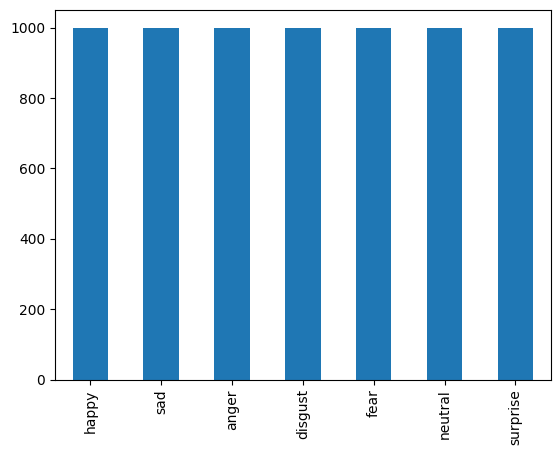

In [3]:
s = df["emotion"].value_counts()
s.plot(kind='bar')
print(s)

## **Start Text Preprocessing**


1. Remove null values from the dataset




In [4]:
def removeNullValues(inputDf):
    inputDf = inputDf.dropna()
    return inputDf

df_cleaned = removeNullValues(df)
df_cleaned

,Comments,emotion
0,"""i kinda like the black acctually .. but that ...",happy
1,"""Awesome discussion.""",happy
2,"""Got it, thanks for the explanation.""",happy
3,"""The patch looks good.""",happy
4,"""Cool cool - thanks stack!""",happy
...,...,...
6995,I asked someone to go out and she accepted rig...,happy
6996,Finished a difficult midterm.,happy
6997,"Did very, very well on a Physics midterm.",happy
6998,When I won my car.,happy


2. Remove the HTML tags

In [5]:
from bs4 import BeautifulSoup

def removeHtmlTags(inputDf):
    for i in range(len(inputDf)):
        currentPhase= inputDf['Comments'].values[i]
        inputDf['Comments'].values[i] = BeautifulSoup(currentPhase,"html.parser").get_text()
    return inputDf

df_without_html = removeHtmlTags(df_cleaned)
df_without_html

<ipython-input-5-84951661bdfc>:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  inputDf['Comments'].values[i] = BeautifulSoup(currentPhase,"html.parser").get_text()
/usr/lib/python3.10/html/parser.py:170: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


,Comments,emotion
0,"""i kinda like the black acctually .. but that ...",happy
1,"""Awesome discussion.""",happy
2,"""Got it, thanks for the explanation.""",happy
3,"""The patch looks good.""",happy
4,"""Cool cool - thanks stack!""",happy
...,...,...
6995,I asked someone to go out and she accepted rig...,happy
6996,Finished a difficult midterm.,happy
6997,"Did very, very well on a Physics midterm.",happy
6998,When I won my car.,happy


03. Convert accented characters to ASCII characters

In [6]:
import unicodedata

def convertAccentedToASCII(inputDf):
    for i in range(len(inputDf)):
        currentPhase= inputDf['Comments'].values[i]
        inputDf['Comments'].values[i] = unicodedata.normalize('NFD', currentPhase).encode('ascii', 'ignore').decode("utf-8")
    return inputDf

df_ascii = convertAccentedToASCII(df_without_html)
df_ascii

,Comments,emotion
0,"""i kinda like the black acctually .. but that ...",happy
1,"""Awesome discussion.""",happy
2,"""Got it, thanks for the explanation.""",happy
3,"""The patch looks good.""",happy
4,"""Cool cool - thanks stack!""",happy
...,...,...
6995,I asked someone to go out and she accepted rig...,happy
6996,Finished a difficult midterm.,happy
6997,"Did very, very well on a Physics midterm.",happy
6998,When I won my car.,happy


4. Expand contractions

In [7]:
#install the contractions
!pip install contractions

# import library
import contractions

def expandContractions(inputDf):
    for i in range(len(inputDf)):
        currentPhase= inputDf['Comments'].values[i]
        expanded_words = []
        for word in currentPhase.split():
        # using contractions.fix to expand the shotened words
          expanded_words.append(contractions.fix(word))

        inputDf['Comments'].values[i] = ' '.join(expanded_words)
    return inputDf

df_contractions_expanded = expandContractions(df_ascii)
df_contractions_expanded

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 5.8 MB/s eta 0:00:00


,Comments,emotion
0,"""i kind of like the black acctually .. but tha...",happy
1,"""Awesome discussion.""",happy
2,"""Got it, thanks for the explanation.""",happy
3,"""The patch looks good.""",happy
4,"""Cool cool - thanks stack!""",happy
...,...,...
6995,I asked someone to go out and she accepted rig...,happy
6996,Finished a difficult midterm.,happy
6997,"Did very, very well on a Physics midterm.",happy
6998,When I won my car.,happy


5. Remove special characters (Remove non-alphanumeric characters)

In [8]:
import re

def removeSpecialCharacters(inputDf):
    for i in range(len(inputDf)):
        currentValue = inputDf['Comments'].values[i]
        inputDf['Comments'].values[i] = re.sub(r"[^a-zA-Z0-9]+", ' ', currentValue)
    return inputDf

df_without_specialChar = removeSpecialCharacters(df_contractions_expanded)
df_without_specialChar

,Comments,emotion
0,i kind of like the black acctually but that m...,happy
1,Awesome discussion,happy
2,Got it thanks for the explanation,happy
3,The patch looks good,happy
4,Cool cool thanks stack,happy
...,...,...
6995,I asked someone to go out and she accepted rig...,happy
6996,Finished a difficult midterm,happy
6997,Did very very well on a Physics midterm,happy
6998,When I won my car,happy


6. Lowercase all texts

In [9]:
def toLowercaseAllText(inputDf):
    for i in range(len(inputDf)):
        currentValue = inputDf['Comments'].values[i]
        inputDf['Comments'].values[i] = currentValue.lower()
    return inputDf

df_lowercase = toLowercaseAllText(df_without_specialChar)
df_lowercase

,Comments,emotion
0,i kind of like the black acctually but that m...,happy
1,awesome discussion,happy
2,got it thanks for the explanation,happy
3,the patch looks good,happy
4,cool cool thanks stack,happy
...,...,...
6995,i asked someone to go out and she accepted rig...,happy
6996,finished a difficult midterm,happy
6997,did very very well on a physics midterm,happy
6998,when i won my car,happy


7.Remove stopwords

In [10]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# stopwords array is prepared by analyzing the dataset. otherwise it will affect the meaning of the sentences and predicted outputs
stopwords = ['a', 'i', 'be', 'the', 'to', 'and', 'my', 'have', 'when', 'of', 'in', 'me', 'that', 'it', 'for', 'do', 'at', 'with', 'on', 'get', 'he', 'this', 'we', 'an', 'about', 'from', 'by', 'but', 'as', 'her', 'after', 'you', 'so', 'she', 'who', 'would', 's', 'his', 'him', 'because', 'there', 'they', 'which', 'could', 'all', 'some', 'just', 'like', 'our', 'want', 'what', 'them', 'can', 'other', 'or', 'into', 'then', 'only', 'while', 'if', 'too', 'us', 'how', 'will']

def removeStopWords(inputDf):
    for i in range(len(inputDf)):
        currentValue = inputDf['Comments'].values[i]
        text_tokens = word_tokenize(currentValue)
        inputDf['Comments'].values[i] = " ".join(word for word in text_tokens if not word in stopwords)
    return inputDf

df_without_stopwords = removeStopWords(df_lowercase)
df_without_stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Comments,emotion
0,kind black acctually may largely due prefering...,happy
1,awesome discussion,happy
2,got thanks explanation,happy
3,patch looks good,happy
4,cool cool thanks stack,happy
...,...,...
6995,asked someone go out accepted right away,happy
6996,finished difficult midterm,happy
6997,did very very well physics midterm,happy
6998,won car,happy


8. Lemmatization

In [11]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatizeDataset(inputDf):
    for i in range(len(inputDf)):
        currentValue = inputDf['Comments'].values[i]
        text_tokens = word_tokenize(currentValue)
        tagged = nltk.pos_tag(text_tokens)

        lemmatized_tokens = [];

        for word, tag in tagged:
          wordnet_tag = get_wordnet_pos(tag)
          if wordnet_tag is None:
            lemmatized_tokens.append(word)
          else:
            lemmatized_tokens.append(lemmatizer.lemmatize(word,wordnet_tag))

        inputDf['Comments'].values[i] = " ".join(word for word in lemmatized_tokens)
    return inputDf

df_lemmatized = lemmatizeDataset(df_without_stopwords)
df_lemmatized

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,Comments,emotion
0,kind black acctually may largely due prefer fi...,happy
1,awesome discussion,happy
2,get thanks explanation,happy
3,patch look good,happy
4,cool cool thanks stack,happy
...,...,...
6995,ask someone go out accepted right away,happy
6996,finish difficult midterm,happy
6997,do very very well physic midterm,happy
6998,won car,happy


Encoding the output labels

In [12]:
def encodeLabels(inputDf):
    inputDf.emotion = inputDf.emotion.map({"anger":0, "happy":1, "sad":2, "fear":3, "disgust":4, "surprise":5})
    return inputDf

df_encoded = encodeLabels(df_lemmatized)
df_encoded

,Comments,emotion
0,kind black acctually may largely due prefer fi...,1.0
1,awesome discussion,1.0
2,get thanks explanation,1.0
3,patch look good,1.0
4,cool cool thanks stack,1.0
...,...,...
6995,ask someone go out accepted right away,1.0
6996,finish difficult midterm,1.0
6997,do very very well physic midterm,1.0
6998,won car,1.0


# **Feature Extraction**

**Extracting Bag of Words parameters**

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

def getBagOfWords(inputDf):
    sentences = inputDf['Comments']
    labelList = inputDf['emotion']
    vectorizer = CountVectorizer(ngram_range=(1,2))
    XMatrix = vectorizer.fit_transform(sentences)
    x = XMatrix.toarray()
    y = np.array(labelList)
    return x,y,vectorizer,XMatrix

x_bow,y_bow, vectorizer_bow,xMatrix_bow = getBagOfWords(df_encoded)

**Extracting TF-IDF parameters**

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

def extractingTfIdfParameters(inputDf):
    sentences = inputDf['Comments']
    labelList = inputDf['emotion']
    #TfidfVectorizer with ngram_range (1,2)
    vectorizer = TfidfVectorizer(ngram_range=(1,2))
    XMatrix = vectorizer.fit_transform(sentences)
    transformer = TfidfTransformer(norm='l2',smooth_idf=True,use_idf=True)

    #transforme to tf idf
    XMatrixFeatures = transformer.fit_transform(XMatrix)

    x =XMatrixFeatures.toarray()
    y =np.array(labelList)

    return x,y,vectorizer,XMatrix


x_tfidf,y_tfidf,vectorizer_tfidf,xMatrix_tfidf = extractingTfIdfParameters(df_encoded)

**Splitting into training and testing data by 8:2 ratio**

In [15]:
from sklearn.model_selection import train_test_split

x_bow_train, x_bow_test, y_bow_train, y_bow_test = train_test_split(x_bow, y_bow, random_state=30, test_size=0.2, shuffle=True)
x_tfidf_train, x_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(x_tfidf, y_tfidf, random_state=30, test_size=0.2, shuffle=True)

In [16]:
# clear the unwanted variables after extracting the parameters. (clear the memory)
x_tfidf = None
y_tfidf = None
x_bow = None
y_bow = None

In [17]:
# use this method to print the Accuracy, Precision, Recall and F1 Score of the trained models

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

def get_metrics(true_labels, predicted_labels):
    #print metrics
    print(metrics.classification_report(true_labels, predicted_labels))
    print("\n \n")
    print("Summary : \n")
    print('Accuracy:', np.round(metrics.accuracy_score(true_labels, predicted_labels),4))
    print('Precision:', np.round(metrics.precision_score(true_labels,predicted_labels,average='weighted'),4))
    print('Recall:', np.round(metrics.recall_score(true_labels,predicted_labels,average='weighted'),4))
    print('F1 Score:', np.round(metrics.f1_score(true_labels,predicted_labels,average='weighted'),4))
    print("\n \n")

    # Print the confusion matrix
    confusionMatrix_bow_lr = confusion_matrix(true_labels, predicted_labels)
    print("Confusion Matrix :\n")
    print(confusionMatrix_bow_lr)
    print("\n \n")

    #plot the heat map of confusion matrix
    plt.figure(figsize = (7,5))
    sn.heatmap(confusionMatrix_bow_lr, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

In [18]:
# Assuming y_bow_train is a NumPy array
y_bow_train = np.nan_to_num(y_bow_train, nan=0)


In [19]:
# Assuming y_bow_train is a Python list
y_bow_train = [0 if np.isnan(x) else x for x in y_bow_train]

# **Training, Testing and Evaluating the models**

**Logistic Regression Model**

01. Logistic Regression Model using BoW parameters

In [20]:
from sklearn.linear_model import LogisticRegression

# Build the logistic Regression Model
classifier_bow_lr = LogisticRegression(max_iter=8000)
classifier_bow_lr.fit(x_bow_train, y_bow_train)

LogisticRegression(max_iter=8000)

In [21]:
# Predict using the model
predictions_bow_lr = classifier_bow_lr.predict(x_bow_test)

In [22]:
# Replace NaN values with 0 in the test set labels
y_bow_test = np.nan_to_num(y_bow_test, nan=0)

Logistic Regression Model with BoW parameters:

              precision    recall  f1-score   support

         0.0       0.71      0.81      0.76       443
         1.0       0.76      0.84      0.80       196
         2.0       0.84      0.69      0.76       185
         3.0       0.86      0.78      0.82       199
         4.0       0.83      0.77      0.80       194
         5.0       0.60      0.54      0.57       183

    accuracy                           0.75      1400
   macro avg       0.77      0.74      0.75      1400
weighted avg       0.76      0.75      0.75      1400


 

Summary : 

Accuracy: 0.7536
Precision: 0.7576
Recall: 0.7536
F1 Score: 0.7527

 

Confusion Matrix :

[[358  10   7   7  13  48]
 [ 13 165   8   5   2   3]
 [ 28  13 128   5   6   5]
 [ 17  15   2 155   6   4]
 [ 21   7   6   5 150   5]
 [ 68   8   2   3   3  99]]

 



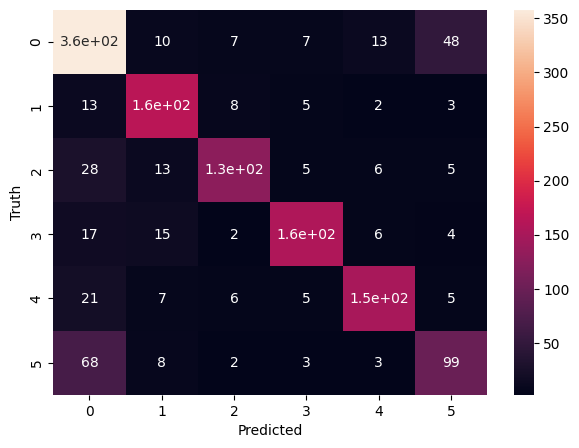

In [23]:
# Evaluate model prediction performance
print("Logistic Regression Model with BoW parameters:\n")
get_metrics(true_labels=y_bow_test,predicted_labels=predictions_bow_lr)


In [24]:
from sklearn.metrics import accuracy_score

# Print training accuracy and testing accuracy of Logistic Regression Model using BoW parameters
print("Comparing the training and testing accuracy of Logistic Regression Model using BoW parameters:\n")
print("Train Accuracy : ", np.round(accuracy_score(y_bow_train, classifier_bow_lr.predict(x_bow_train)),4))
print("Test Accuracy : ", np.round(accuracy_score(y_bow_test, predictions_bow_lr),4))

Comparing the training and testing accuracy of Logistic Regression Model using BoW parameters:

Train Accuracy :  0.9948
Test Accuracy :  0.7536


In [25]:
# Replace NaN values with 0 in the training set labels
y_tfidf_train = np.nan_to_num(y_tfidf_train, nan=0)

02. Logistic Regression Model using TfIdf parameters

In [26]:
# Build the logistic Regression Model
classifier_tfidf_lr = LogisticRegression(max_iter=8000)
classifier_tfidf_lr.fit(x_tfidf_train, y_tfidf_train)

LogisticRegression(max_iter=8000)

In [27]:
# Predict using the model
predictions_tfidf_lr = classifier_tfidf_lr.predict(x_tfidf_test)

In [28]:
# Replace NaN values with 0 in the test set labels
y_tfidf_test = np.nan_to_num(y_tfidf_test, nan=0)

Logistic Regression Model with TF-IDF parameters:

              precision    recall  f1-score   support

         0.0       0.52      0.95      0.68       443
         1.0       0.91      0.71      0.80       196
         2.0       0.90      0.58      0.70       185
         3.0       0.93      0.64      0.76       199
         4.0       0.93      0.63      0.75       194
         5.0       0.77      0.25      0.38       183

    accuracy                           0.69      1400
   macro avg       0.83      0.63      0.68      1400
weighted avg       0.77      0.69      0.68      1400


 

Summary : 

Accuracy: 0.6864
Precision: 0.7739
Recall: 0.6864
F1 Score: 0.6795

 

Confusion Matrix :

[[420   1   2   4   4  12]
 [ 51 139   6   0   0   0]
 [ 64   8 107   2   3   1]
 [ 65   2   3 127   2   0]
 [ 65   2   1   3 122   1]
 [136   1   0   0   0  46]]

 



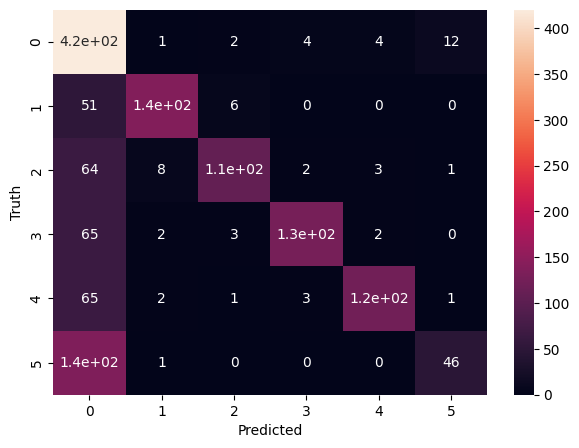

In [29]:
# Evaluate model prediction performance
print("Logistic Regression Model with TF-IDF parameters:\n")
get_metrics(true_labels=y_tfidf_test,predicted_labels=predictions_tfidf_lr)

In [30]:
# Print training accuracy and testing accuracy of Logistic Regression Model using TF-IDF parameters
print("Comparing the training and testing accuracy of Logistic Regression Model using TF-IDF parameters:\n")
print("Train Accuracy : ", np.round(accuracy_score(y_tfidf_train, classifier_tfidf_lr.predict(x_tfidf_train)),4))
print("Test Accuracy : " , np.round(accuracy_score(y_tfidf_test, predictions_tfidf_lr),4))

Comparing the training and testing accuracy of Logistic Regression Model using TF-IDF parameters:

Train Accuracy :  0.9755
Test Accuracy :  0.6864


**SVM Model**
01. SVM Model using BoW parameters

In [31]:
# from sklearn.svm import SVC

# # Build the SVM Model
# classifier_bow_svm = SVC(kernel='rbf', C=10, gamma=0.1)
# classifier_bow_svm.fit(x_bow_train,y_bow_train)

In [32]:
# Predict using the model
# predictions_bow_svm = classifier_bow_svm.predict(x_bow_test)

In [33]:
# Evaluate model prediction performance
# print("SVM Model with BoW parameters:\n")
# get_metrics(true_labels=y_bow_test,predicted_labels=predictions_bow_svm)

In [34]:
# Print training accuracy and testing accuracy of SVM Model using BoW parameters
# print("Comparing the training and testing accuracy of SVM Model using BoW parameters:\n")
# print("Train Accuracy : ", np.round(accuracy_score(y_bow_train, classifier_bow_svm.predict(x_bow_train)),4))
# print("Test Accuracy : ", np.round(accuracy_score(y_bow_test, predictions_bow_svm),4))

02. SVM Model using TF-IDF parameters

In [35]:
# from sklearn.svm import SVC

# # Build the SVM Model
# classifier_tfidf_svm = SVC(kernel='rbf', C=10, gamma=1)
# classifier_tfidf_svm.fit(x_tfidf_train,y_tfidf_train)

In [36]:
# Predict using the model
# predictions_tfidf_svm = classifier_tfidf_svm.predict(x_tfidf_test)

In [37]:
# Evaluate model prediction performance
# print("SVM Model with TF-IDF parameters:\n")
# get_metrics(true_labels=y_tfidf_test,predicted_labels=predictions_tfidf_svm)

In [38]:
# Print training accuracy and testing accuracy of SVM Model using TF-IDF parameters--------"""
# print("Comparing the training and testing accuracy of SVM Model using TF-IDF parameters:\n")
# print("Train Accuracy : ", np.round(accuracy_score(y_tfidf_train, classifier_tfidf_svm.predict(x_tfidf_train)),4))
# print("Test Accuracy : ", np.round(accuracy_score(y_tfidf_test, predictions_tfidf_svm),4))

**Random Forest Model**
01. Random Forest Model using BoW parameters

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Build the Random Forest Model
classifier_bow_rf = RandomForestClassifier(n_estimators = 25, random_state = 0)
classifier_bow_rf.fit(x_bow_train,y_bow_train)

RandomForestClassifier(n_estimators=25, random_state=0)

In [40]:
# Predict using the model
predictions_bow_rf = classifier_bow_rf.predict(x_bow_test)

Random Forest Model with BoW parameters:

              precision    recall  f1-score   support

         0.0       0.63      0.86      0.73       443
         1.0       0.72      0.75      0.74       196
         2.0       0.76      0.70      0.73       185
         3.0       0.86      0.70      0.77       199
         4.0       0.88      0.69      0.77       194
         5.0       0.67      0.37      0.48       183

    accuracy                           0.71      1400
   macro avg       0.75      0.68      0.70      1400
weighted avg       0.73      0.71      0.71      1400


 

Summary : 

Accuracy: 0.715
Precision: 0.7321
Recall: 0.715
F1 Score: 0.709

 

Confusion Matrix :

[[383  13  12   5   6  24]
 [ 27 147  14   2   2   4]
 [ 32  12 130   6   4   1]
 [ 35  11   5 140   6   2]
 [ 36  10   6   7 133   2]
 [ 98  10   3   3   1  68]]

 



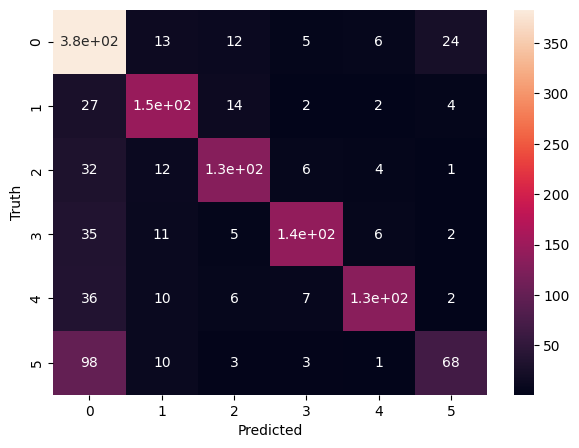

In [41]:
# Evaluate model prediction performance
print("Random Forest Model with BoW parameters:\n")
get_metrics(true_labels=y_bow_test,predicted_labels=predictions_bow_rf)

In [42]:
# Print training accuracy and testing accuracy of Random Forest Model using BoW parameters--------"""
print("Comparing the training and testing accuracy of Random Forest Model using BoW parameters:\n")
print("Train Accuracy : ", np.round(accuracy_score(y_bow_train, classifier_bow_rf.predict(x_bow_train)),4))
print("Test Accuracy : ", np.round(accuracy_score(y_bow_test, predictions_bow_rf),4))

Comparing the training and testing accuracy of Random Forest Model using BoW parameters:

Train Accuracy :  0.997
Test Accuracy :  0.715


02. Random Forest Model using TF-IDF parameters

In [43]:
# Build the Random Forest Model
classifier_tfidf_rf = RandomForestClassifier(n_estimators = 25, random_state = 0)
classifier_tfidf_rf.fit(x_tfidf_train,y_tfidf_train)

RandomForestClassifier(n_estimators=25, random_state=0)

In [44]:
# Predict using the model
predictions_tfidf_rf = classifier_tfidf_rf.predict(x_tfidf_test)

Random Forest Model with TF-IDF parameters:

              precision    recall  f1-score   support

         0.0       0.60      0.89      0.71       443
         1.0       0.80      0.72      0.76       196
         2.0       0.90      0.64      0.75       185
         3.0       0.92      0.72      0.81       199
         4.0       0.89      0.72      0.79       194
         5.0       0.61      0.39      0.48       183

    accuracy                           0.72      1400
   macro avg       0.79      0.68      0.72      1400
weighted avg       0.75      0.72      0.72      1400


 

Summary : 

Accuracy: 0.7207
Precision: 0.7537
Recall: 0.7207
F1 Score: 0.7189

 

Confusion Matrix :

[[394   9   6   4   5  25]
 [ 38 141   4   1   3   9]
 [ 45   7 119   3   4   7]
 [ 41   7   2 144   3   2]
 [ 40   8   1   2 139   4]
 [103   4   0   2   2  72]]

 



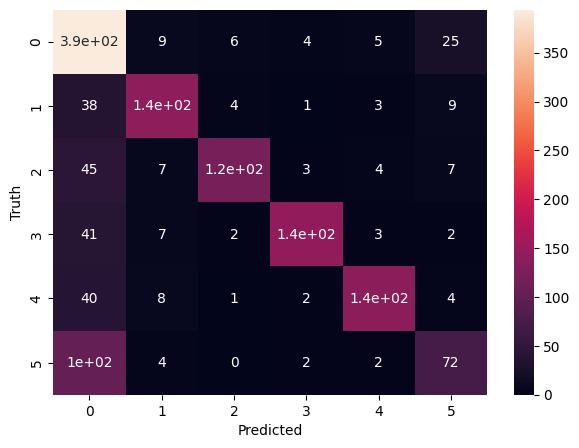

In [45]:
# Evaluate model prediction performance
print("Random Forest Model with TF-IDF parameters:\n")
get_metrics(true_labels=y_tfidf_test,predicted_labels=predictions_tfidf_rf)

In [46]:
# Print training accuracy and testing accuracy of Random Forest Model using TF-IDF parameters
print("Comparing the training and testing accuracy of Random Forest Model using TF-IDF parameters:\n")
print("Train Accuracy : ", np.round(accuracy_score(y_tfidf_train, classifier_tfidf_rf.predict(x_tfidf_train)),4))
print("Test Accuracy : ", np.round(accuracy_score(y_tfidf_test, predictions_tfidf_rf),4))

Comparing the training and testing accuracy of Random Forest Model using TF-IDF parameters:

Train Accuracy :  0.9962
Test Accuracy :  0.7207


**Naive Bayes Model**
01. Naive Bayes Model using BoW parameters

In [47]:
from sklearn.naive_bayes import MultinomialNB

# Build the Naive Bayes Model
classifier_bow_nb = MultinomialNB(alpha=1)
classifier_bow_nb.fit(x_bow_train,y_bow_train)

MultinomialNB(alpha=1)

In [48]:
# Predict using the model
predictions_bow_nb = classifier_bow_nb.predict(x_bow_test)

Naive Bayes Model with BoW parameters:

              precision    recall  f1-score   support

         0.0       0.74      0.81      0.77       443
         1.0       0.77      0.83      0.80       196
         2.0       0.77      0.65      0.71       185
         3.0       0.72      0.81      0.76       199
         4.0       0.79      0.78      0.78       194
         5.0       0.73      0.51      0.60       183

    accuracy                           0.75      1400
   macro avg       0.75      0.73      0.74      1400
weighted avg       0.75      0.75      0.75      1400


 

Summary : 

Accuracy: 0.75
Precision: 0.7504
Recall: 0.75
F1 Score: 0.746

 

Confusion Matrix :

[[359  10   8  19  19  28]
 [ 11 163  12   8   2   0]
 [ 24  16 121  14   7   3]
 [ 19   6   5 162   6   1]
 [ 14   8   6  13 151   2]
 [ 58   8   6  10   7  94]]

 



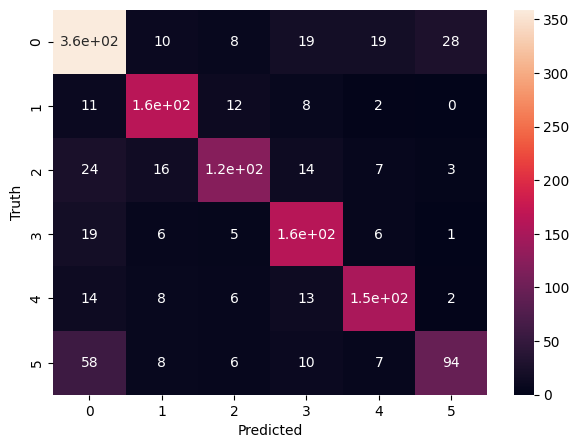

In [49]:
# Evaluate model prediction performance
print("Naive Bayes Model with BoW parameters:\n")
get_metrics(true_labels=y_bow_test,predicted_labels=predictions_bow_nb)

In [50]:
# Print training accuracy and testing accuracy of Naive Bayes Model using BoW parameters
print("Comparing the training and testing accuracy of Naive Bayes Model using BoW parameters:\n")
print("Train Accuracy : ", np.round(accuracy_score(y_bow_train, classifier_bow_nb.predict(x_bow_train)),4))
print("Test Accuracy : ", np.round(accuracy_score(y_bow_test, predictions_bow_nb),4))

Comparing the training and testing accuracy of Naive Bayes Model using BoW parameters:

Train Accuracy :  0.9668
Test Accuracy :  0.75


02. Naive Bayes Model using TF-IDF parameters

In [51]:
# Build the Naive Bayes Model
classifier_tfidf_nb = MultinomialNB(alpha=1)
classifier_tfidf_nb.fit(x_tfidf_train,y_tfidf_train)

MultinomialNB(alpha=1)

In [52]:
# Predict using the model
predictions_tfidf_nb = classifier_tfidf_nb.predict(x_tfidf_test)

Naive Bayes Model with TF-IDF parameters:

              precision    recall  f1-score   support

         0.0       0.47      0.98      0.64       443
         1.0       0.94      0.68      0.79       196
         2.0       0.90      0.45      0.60       185
         3.0       0.93      0.57      0.71       199
         4.0       0.94      0.47      0.63       194
         5.0       0.86      0.10      0.19       183

    accuracy                           0.63      1400
   macro avg       0.84      0.54      0.59      1400
weighted avg       0.78      0.63      0.60      1400


 

Summary : 

Accuracy: 0.6257
Precision: 0.7752
Recall: 0.6257
F1 Score: 0.603

 

Confusion Matrix :

[[436   0   1   2   1   3]
 [ 59 133   4   0   0   0]
 [ 91   8  83   2   1   0]
 [ 78   1   3 113   4   0]
 [ 97   0   1   4  92   0]
 [164   0   0   0   0  19]]

 



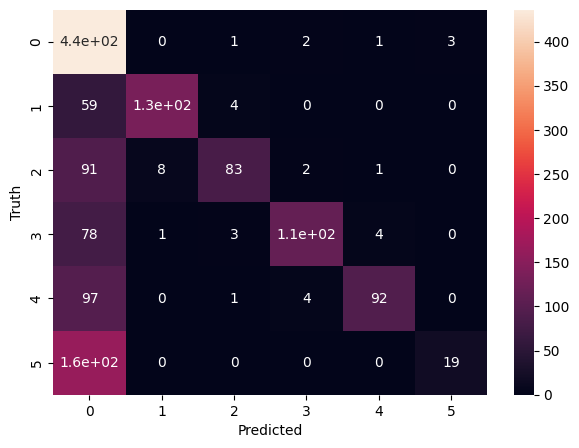

In [53]:
# Evaluate model prediction performance
print("Naive Bayes Model with TF-IDF parameters:\n")
get_metrics(true_labels=y_tfidf_test,predicted_labels=predictions_tfidf_nb)

In [54]:
# Print training accuracy and testing accuracy of Naive Bayes Model using TF-IDF parameters
print("Comparing the training and testing accuracy of Naive Bayes Model using TF-IDF parameters:\n")
print("Train Accuracy : ", np.round(accuracy_score(y_tfidf_train, classifier_tfidf_nb.predict(x_tfidf_train)),4))
print("Test Accuracy : ", np.round(accuracy_score(y_tfidf_test, predictions_tfidf_nb),4))

Comparing the training and testing accuracy of Naive Bayes Model using TF-IDF parameters:

Train Accuracy :  0.945
Test Accuracy :  0.6257


## **Predictions**

The prediction is done using the best performing model - **Logistic Regression Model** with **BOW parameters**

In [62]:
# upload the test dataset
testUpload = files.upload()
testDf = pd.read_excel('TestDataSet.xlsx')

#pre-process the dataset
testDf = removeHtmlTags(testDf)
testDf = convertAccentedToASCII(testDf)
testDf = expandContractions(testDf)
testDf = removeSpecialCharacters(testDf)
testDf = toLowercaseAllText(testDf)
testDf = removeStopWords(testDf)
testDf = lemmatizeDataset(testDf)

def getBagOfWords(inputDf,vectorizer):
    sentences = inputDf['Comments']
    #vectorizer = CountVectorizer(ngram_range=(1,2))
    XMatrix = vectorizer.transform(sentences)
    x = XMatrix.toarray()
    return x

x_bow_testing = getBagOfWords(testDf,vectorizer_bow)


Saving TestDataSet.xlsx to TestDataSet (1).xlsx


In [63]:
# use this method to convert label value to emotion
def numbers_to_strings(argument):
  if(argument == 0):
    return "anger"
  elif(argument == 1):
    return "happy"
  elif(argument == 2):
    return "sad"
  elif(argument == 3):
    return "fear"
  elif(argument == 4):
    return "disgust"
  elif(argument == 5):
    return "surprise"

In [64]:
prediction = classifier_bow_lr.predict(x_bow_testing)

print(prediction)
print([numbers_to_strings(x) for x in prediction])


[0. 0. 0. 0. 2. 5. 3. 1. 0. 0.]
['anger', 'anger', 'anger', 'anger', 'sad', 'surprise', 'fear', 'happy', 'anger', 'anger']


**Sample UI to predict the emotions**

In [65]:
# predict the output emotion using the selected model
def answer_question(comment):

  # initialise the dataset
  inputData = {'Comments':[comment]}
  # Create DataFrame
  inputDataDF = pd.DataFrame(inputData)
  #pre-processing
  inputDataDF = removeNullValues(inputDataDF)
  inputDataDF = removeHtmlTags(inputDataDF)
  inputDataDF = convertAccentedToASCII(inputDataDF)
  inputDataDF = expandContractions(inputDataDF)
  inputDataDF = removeSpecialCharacters(inputDataDF)
  inputDataDF = toLowercaseAllText(inputDataDF)
  inputDataDF = removeStopWords(inputDataDF)
  inputDataDF = lemmatizeDataset(inputDataDF)

  x_bow_inputDataDF = getBagOfWords(inputDataDF,vectorizer_bow)

  prediction_inputDataDF = classifier_bow_lr.predict(x_bow_inputDataDF)

  return numbers_to_strings(prediction_inputDataDF[0])


In [66]:
# install & import gradio
!pip install gradio==3.50
import gradio as gr


In [60]:
#create the UI
# gr.Interface(fn=answer_question, inputs=[textbox(lines=2, label="Sentence",placeholder="Enter Here… ")], outputs=[gtextbox(label="Emotion")],title="Let's predict what you have meant", description="Hey there, we are here to predict what you feel right now. Please use the below text area to enter what is in your mind and, then click on the Submit button. We will predict and let you know what you really feel out of the main six emotions; Happy, Anger, Sad, Surprise, Disgust and Fear.",allow_flagging=False,allow_screenshot=False, theme="huggingface",layout="vertical").launch()


In [67]:
#create the UI
gr.Interface(fn=answer_question, inputs="textbox", outputs="textbox").launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://25c1ad3f3fd0bf9702.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
